# Week 2 - Implementation of Shaffer et al

In [2]:
# This line tells matplotlib to include plots here
%matplotlib inline
import numpy as np # We'll need numpy later
from scipy.stats import kstest, ttest_ind, ks_2samp, zscore, norm
import matplotlib.pyplot as plt # This lets us access the pyplot functions
import math

## (1) Estimation of a sample mean from a normally distributed variable.

Let us assume that a true distribution of a process is described by the normal distribution with $\mu=5$ and $\sigma=1$. You have a measurement technique that allows you to sample n points from this distribution. In Python we can use a random number generator whose numbers will be chosen from the desired normal distribution by using the function `np.random.normal`. Sample from this normal distribution from n=1 to 50 (i.e. n=1:50). Create a plot for the standard deviation of the calculated mean from each n when you repeat the sampling 1000 times each. (i.e. You will repeat your n observations 1000 times and will calculate the sample mean for each of the 1000 trials).

1.0025768358183995
1.0025768358183995
50


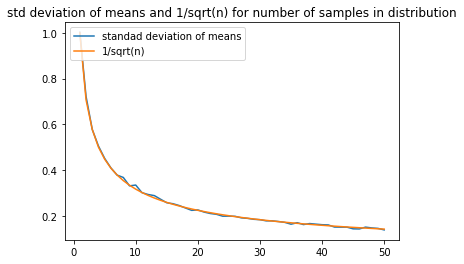

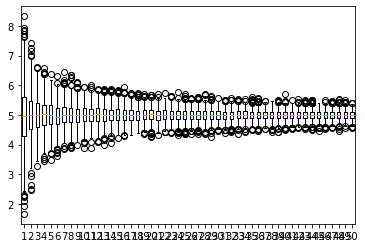

In [3]:
# Initial code here
def sdplot():
    A = []
    lsd = []
    global ia
    ia = []
    ib = []
    global lsdx
    lsdx = []
    global MA
    MA = []
    for c in range (1,51):
        AX = []
        for cc in range (1,1001): #make 1000 distributions with gifferent sample sizes
            X = np.random.normal(5, 1, c) #distrubution with 1 -50 samples c = n number of samples in the distribution
            m = np.sum(X)/np.size(X) #mean of the samples
            AX = np.append(AX, m) #stores the sample means (adding a new mean each time it samples from X)
            A = np.append(A, m) #store the mean in an array (stores ALL 50000 means)
            sqia = (1 / math.sqrt(c)) # get value 1/sqrt(n)
        #print(np.size(A))
        #print(np.size(AX))
        MA.append(AX)
        ia = np.append(ia, c) #updates an array with the number of samples for that mean (m pos 1 is the mean for ia position 1, where ia position 1 is the number of
        #samples in that distribution  
        sdx = np.std(AX)
        lsdx = np.append(lsdx, sdx)
        #print(lsdx)
        ib = np.append(ib, sqia)                                                                 
        #sd = np.std(A)
        #lsd = np.append(lsd,sd)
    print(np.std(MA[0]))
    print(lsdx[0])
    print(len(MA))
    #print(np.size(A))
    #print(ia)
    #print(np.size(lsd))
    #print((lsd))
    #print(i)
    plt.figure()
    plt.plot(ia,lsdx, label = "standad deviation of means")
    plt.plot(ia, ib, label = "1/sqrt(n)")
    plt.legend(loc="upper left")
    plt.title("std deviation of means and 1/sqrt(n) for number of samples in distribution")
    plt.figure()
    plt.boxplot(MA)
sdplot()

#### 1a. Plot the standard deviation of the sample mean versus n. Add a second line which is 1/sqrt(n). Describe what this tells you about the relationship between n and your power to estimate the underlying mean.

This tells me that as n increases the power of my estimated mean increases, the std deviation of my deviation decreases by apprx. 1/sqrt(n). The standard deciation represents the width of teh distribution, so as I the distribution of 1000 means has more samples taken in them, the distributions become tighter, meaning that when you sample 1000 means, the means are more likely to be closer toghether, if you take more samples originally


#### 1b. Plot the boxplot for the sample means for all values n. Using words, interpret what the boxplot view of the 1000 trials for n=1 means and what the trends in the boxplot demonstrate compared to the plot in 1a. What information do you gain or lose in the two different plotting schemes?

# Answer to 1b here
The boxplot shows that as the number of samples in the distribution, that the variance from the mean decreases, which follows the logic from 1a. This confirms the logic, and actually shows how the distributions variance and standard deviation changes as the number of samples in the distribution of means increases. 

#### 1c. For n=3, plot the histogram of the mean for the 1000 trials. Use the Kolmogorov-Smirnov test to see if this sample distribution is normal. (Hint: You may need to translate this to the *standard* normal distribution.) Report the sample mean and sample standard deviation, the p-value from the test, and whether you would reject the null hypothesis.

[-1.5647028475470703, 1.0151614950470564, 1.5932036606215365, -1.2118952518192787, -1.1593301825786997, 1.5733621634248958, -0.11039447408195864, 1.3659585204374163, -0.7587603349441295, 0.3294121634294052, 0.9331907096253066, -1.745138388702416, -0.13805254866834615, -0.3060470068048481, 0.7660693018106475, -0.10594084593947686, -0.7427420760852007, 1.7522890435777503, -0.39724917845131125, 0.2935072458334973, -1.0107438431702807, 1.2936800680559697, 0.47496693797331946, -0.6280064608534777, 1.2782881761083016, 1.0513964528349433, -1.1989700290056988, -0.4212687770758076, -1.0567478554683012, -1.0991641418850717, -2.1198686689137456, 1.5271238094629684, 0.03651339563039184, -0.7443377396443926, 1.957430843159685, 0.8600385982218742, -0.9216896615141041, -0.822309426349896, -0.36018732219927396, 0.2234377850374071, -0.052343460899145086, 0.16191840530618976, -1.0298675595808924, 0.5939305551192355, -0.957072411052092, -0.5328740275452594, 0.5307531351523538, -0.07456529520808776, -0.08

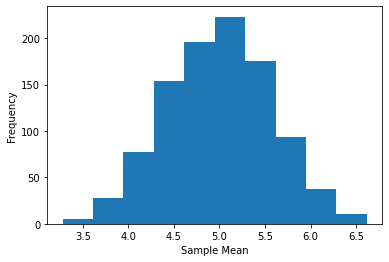

For n=3:
Mean of sample means: 4.994871708778901
Standard deviation of sample means: 0.5777476899277872
p-value of Kolmogorov-Smirnov test: 0.9732453971633439
Sample mean:  4.994871708778901
Sample std:  0.5774587438282304
Standardized distribution of MA[2] below:
KstestResult(statistic=0.015215048903989004, pvalue=0.9720500652725891)
if p-val is less than 0.05 do not reject null hypothesis:


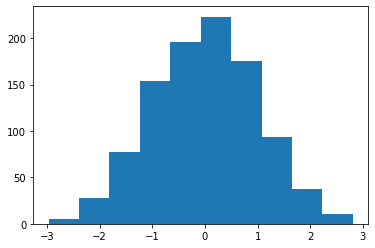

In [20]:
# Answer to 1c here
sample_group = MA[2]
plt.hist(sample_group)
plt.ylabel('Frequency')
plt.xlabel('Sample Mean')

pop_std = np.std(sample_group, ddof=1)
#for mean in sample_group:
 #   print((mean-pop_mean)/pop_std)
    
    
pop_mean = np.mean(sample_group)
#print((sample_group))
normalized = [(mean - pop_mean) / pop_std for mean in sample_group] 
print((normalized))
test_stat, p_value = kstest(normalized, 'norm')
plt.show()

print('For n=3:');
print(f'Mean of sample means: {pop_mean}');
print(f'Standard deviation of sample means: {pop_std}');
print(f'p-value of Kolmogorov-Smirnov test: {p_value}');

zMA = zscore(MA[2])
plt.hist(zMA,10)
print("Sample mean: " ,np.mean(MA[2]))
print("Sample std: " ,np.std(MA[2]))
print("Standardized distribution of MA[2] below:")
print(kstest(zMA, 'norm', args=(0,1)))
print("if p-val is less than 0.05 do not reject null hypothesis:")

#### 1d. Repeat 1c but for n=20. What changes when the number of samples increases?

KstestResult(statistic=0.013329031722907891, pvalue=0.9933139716077848)


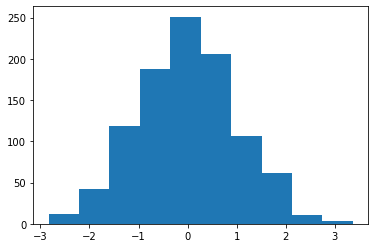

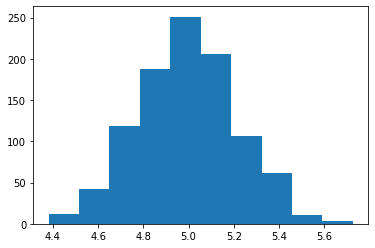

In [4]:
# Answer to 1c here
#nMA = (MA[20]-mean from samples)/lsdx[20]

zMA = zscore(MA[20])
#plt.hist(nMA)
plt.figure()
plt.hist(zMA, 10)
plt.figure()
plt.hist(MA[20],10)

print(kstest(zMA, 'norm', args=(0,1)))
#print(kstest(nMA, 'norm'))


As number of samples increases the distribution of the means begin to look more gaussian, and the p-value tends to increase. When tested agains a normal distribution. 

## (2) Now we will explore sampling from an alternate distribution type.

#### 2a. Sample the Pareto distribution (`np.random.pareto`) with parameter shape = 5, 1000 times. Plot the histogram of these values. Describe the shape of this histogram in words. Is it anything like the normal distribution?

(array([728., 162.,  67.,  23.,  11.,   5.,   1.,   1.,   1.,   1.]),
 array([4.94434681e-04, 2.83011280e-01, 5.65528126e-01, 8.48044972e-01,
        1.13056182e+00, 1.41307866e+00, 1.69559551e+00, 1.97811235e+00,
        2.26062920e+00, 2.54314605e+00, 2.82566289e+00]),
 <BarContainer object of 10 artists>)

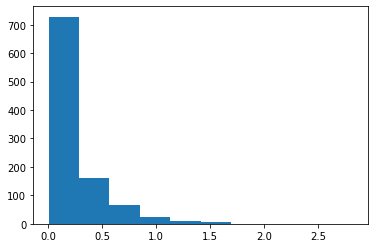

In [6]:
# Answer 2a here
PR = np.random.pareto(5, 1000)
plt.hist(PR, 10)
# The histogram of the pareto looks very little like the normal distribution. Instead of the mojority of the distribution samples being in the center or the median value being approximately the mean, the mean of this sample is heavily
#skewed to one side of the distribution, the front end. This distribution is shaped like a cliff on one edge and a slope on the other, with it trailing in samples the farther it gets from 0. The one resemblence to a normal distribution
#is that the mean is close to zero (although it will be heavily pulled away by any samples with high value, making this susceptible to variance issues, but the median is close oto 0 as well), as the standardized normal would have the mean close to 0. 

Very different than normal distribution.

#### 2b. As in problem 1, plot a boxplot of the sample distribution from n=1:50. How does this differ from the plot in 1b and why? Plot the standard deviations of the sample means versus n. Is this any different?

In [10]:
# Answer 2b here
def sdplotPR(r):
    A = []
    lsd = []
    global ic
    ic = []
    ib = []
    global lsdxpr
    lsdxpr = []
    global PR
    PR = []
    for c in range (1,r+1):
        AX = []
        for cc in range (1,1001): #make 1000 distributions with gifferent sample sizes
            X = np.random.pareto(5, c) #distrubution with 1 -50 samples c = n number of samples in the distribution
            m = np.sum(X)/np.size(X) #mean of the samples
            AX = np.append(AX, m) #stores the sample means (adding a new mean each time it samples from X)
            A = np.append(A, m) #store the mean in an array (stores ALL 50000 means)
            sqia = (1 / math.sqrt(c)) # get value 1/sqrt(n)
        PR.append(AX)
        ic = np.append(ic, c) #updates an array with the number of samples for that mean (m pos 1 is the mean for ia position 1, where ia position 1 is the number of
        #samples in that distribution  
        sdx = np.std(AX)
        lsdxpr = np.append(lsdxpr, sdx)
        #print(lsdx)
        ib = np.append(ib, sqia)                                                                 
        #sd = np.std(A)
        #lsd = np.append(lsd,sd)
    #print(np.std(PR[0]))
    #print(lsdxpr[0])
    #print(len(PR))
    plt.figure()
    plt.plot(ic, lsdxpr, label = "standad deviation of means")
    plt.plot(ic, ib, label = "1/sqrt(n)")
    plt.legend(loc="upper left")
    plt.title("std deviation of means and 1/sqrt(n) for number of samples in distribution")
    plt.figure()
    plt.boxplot(PR)

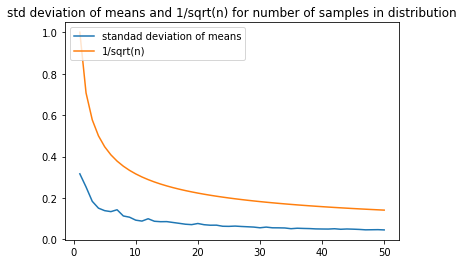

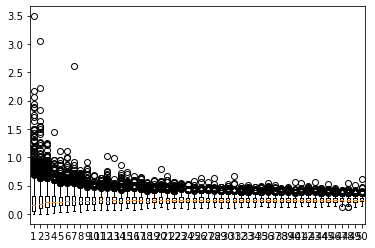

In [8]:
sdplotPR(50)

The std deviation decreases, as sample increase, however, it starts low already. And the boxplot shows higher variance, though it does decrease as number of samples increase.

#### 2c. For n=3, plot the histogram of the sample means. What is this distribution—Pareto or normal? Report your test results.

KstestResult(statistic=0.5053745426183325, pvalue=4.631668983396869e-237)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.994, pvalue=0.0)


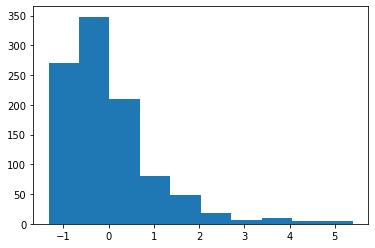

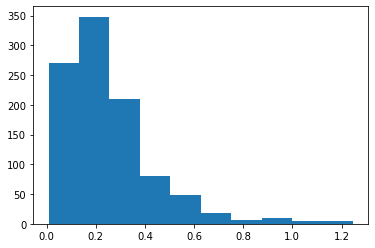

In [11]:
# Answer to 2c
#pareto_smp = pareto.rvs(5, size=1000)
XX = np.random.normal(5, 1, 1000)
XY = np.random.pareto(5, 1000)
#zPR = zscore(PR[2])
plt.figure()
plt.hist(zPR, 10)
plt.figure()
plt.hist(PR[2],10)

#print(kstest(zPR, 'norm', args=(0,1)))
print(kstest(PR[2], 'norm', args=(0,1)))
print(kstest(PR[2], 'pareto', args=(5,3)))
print(ks_2samp(XX,XY))

It still looks pareto, but the p-value of the kstest does not agree. And it is not exactly pareto, as pareto would need more samples in the first histogram bucket. Therefore it is neither truly gaussian or pareto 

#### 2d. Repeat 2b and 2c for n=100.

KstestResult(statistic=0.03390563053977069, pvalue=0.19599612456550775)
KstestResult(statistic=1.0, pvalue=0.0)


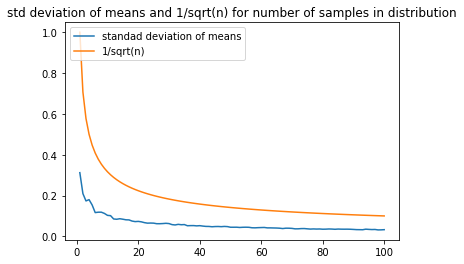

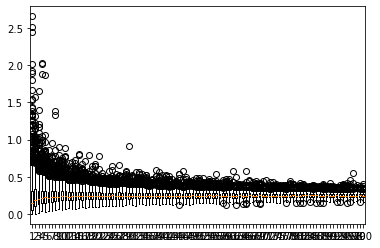

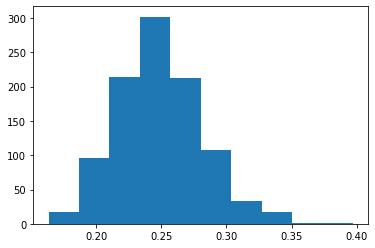

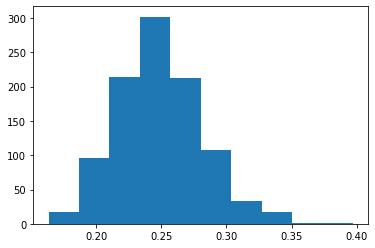

In [12]:
# Answer to 2d
sdplotPR(100)
XX = np.random.normal(0, 1, 1000)
XY = np.random.pareto(5, 1000)
plt.figure()
zPR = zscore(PR[99])
plt.hist(PR[99], 10)
plt.figure()
plt.hist(PR[99],10)
#print(kstest(zPR, 'norm'))
#print(kstest(zPR, 'pareto', (5,1000)))
#print(ks_2samp(PR[2], XX))
#print(kstest(zPR, 'norm'))
#print(ks_2samp(XY,PR[2]))

print(kstest(zPR, 'norm', args=(0,1)))
print(kstest(PR[99], 'pareto', args=(5, 100)))



The first plots repeat what happened in 2b, however, now we see in that the mean distributions are definitely gaussian. 

## (3) Differential expression. In this problem you will use the two-sample t-test to explore what differential hypothesis testing looks like in known standards and how multiple hypothesis correction effects the number of false positives and negatives from these tests.
- Distribution 1, log-normal with mu=1, sigma=1
- Distribution 2, log-normal with mu=3, sigma=1

#### 3a. False Negative: Using n=3, perform 100 comparisons of distribution 1 versus distribution 2 with an alpha=0.05. Anytime you fail to reject the hypothesis it is a false negative. Why is this a false negative? Report the number of false negatives from your 100 tests.

Hint: It'd be helpful to define a function that does this for you at this point.

def lnm(r):
    A = []
    lsd = []
    global ie
    ie = []
    ib = []
    global lsdxln
    lsdxln = []
    global ln
    ln = []
    global ln2
    ln2 = []
    for c in range (1,4):
        AX = []
        AB = []
        for cc in range (1, r+1): #make distributions with different sample sizes for means of them
            DA = np.random.lognormal(1,1,3)
            BD = np.random.lognormal(3,1,3)
            m = np.sum(DA)/np.size(DA) #mean of the samples
            m2 = np.sum(BD)/np.size(BD) #mean of the samples
            AX = np.append(AX, m) #stores the sample means (adding a new mean each time it samples from X)
            AB = np.append(AB, m2)
            sqia = (1 / math.sqrt(c)) # get value 1/sqrt(n)
            #print(AX)
        #print(pval)
        ln.append(AX)
        ln2.append(AB)
        ie = np.append(ic, c) #updates an array with the number of samples for that mean (m pos 1 is the mean for ia position 1, where ia position 1 is the number of
        #samples in that distribution  
        sdx = np.std(AX)
        lsdxln = np.append(lsdxln, sdx)
        #print(lsdx)
        ib = np.append(ic, sqia) 
    return

lnm(100)
numfalse = 0
print((ln2))
for x in range (0,4):
    ts, pval = ttest_ind(ln[x+1],ln2[x+1])
    if pval > 0.05:
        numfalse = numfalse + 1
print(numfalse)

# The number of false negatives is below


In [182]:
def lnm(r):
    A = []
    lsd = []
    global ie
    ie = []
    ib = []
    global lsdxln
    lsdxln = []
    global ln
    ln = []
    global ln2
    ln2 = []
    for c in range (1,r+1):
        AX = []
        AB = []
        for cc in range (1, 2+1): #make distributions with different sample sizes for means of them
            DA = np.random.lognormal(1,1,3)
            BD = np.random.lognormal(3,1,3)
            m = np.sum(DA)/np.size(DA) #mean of the samples
            m2 = np.sum(BD)/np.size(BD) #mean of the samples
            AX = np.append(AX, m) #stores the sample means (adding a new mean each time it samples from X)
            AB = np.append(AB, m2)
            sqia = (1 / math.sqrt(c)) # get value 1/sqrt(n)
            #print(AX)
        #print(pval)
        ln.append(AX)
        ln2.append(AB)
        ie = np.append(ie, c) #updates an array with the number of samples for that mean (m pos 1 is the mean for ia position 1, where ia position 1 is the number of
        #samples in that distribution  
        sdx = np.std(AX)
        lsdxln = np.append(lsdxln, sdx)
        #print(lsdx)
        ib = np.append(ie, sqia) 
    return

In [186]:
lnm(100)
numfalse = 0
for x in range (0,100):
    ts, pval = ttest_ind(ln[x],ln2[x])
    if pval > 0.05:
        numfalse = numfalse + 1
print(numfalse)
#print(ln[0])
# The number of false negatives is below

75


These are the number of false negatives, because in our test this is when the distribution of means from the of one sample and a different sample would be thought to be from the same distribution, but they are not actually. So if our null hypothesis was that these were from the same distribution, which is what the t test does, then the times that our p value was above the alpha (0.05) is the times we would fail to reject and not be able to say that the two distributions are different. We accept bad values. (for 3a - 3c I used three sample means from three distributions, that is why the false negatives may be less than in 3 d where I do not) The amount of for loops and dependicies got really high if we did 100 means of 100 samples sweeping from samples 1 to three, also the means are so close that it will not reject at most times, unless we have very small samples. 

#### 3b. False Positives: Using n=3, perform 100 comparisons of distribution 1 versus distribution 1 with an alpha=0.05. Anytime you reject the hypothesis this is a false positive. Why is this a false positive? Report the number of false positives from your 100 tests.

In [191]:
def lnm2(r):
    A = []
    lsd = []
    global ie
    ie = []
    ib = []
    global lsdxln
    lsdxln = []
    global ln
    ln = []
    global ln2
    ln2 = []
    for c in range (1,r+1):
        AX = []
        AB = []
        for cc in range (1, 2+1): #make distributions with different sample sizes for means of them
            DA = np.random.lognormal(1,1,3)
            BD = np.random.lognormal(1,1,3)
            m = np.sum(DA)/np.size(DA) #mean of the samples
            m2 = np.sum(BD)/np.size(BD) #mean of the samples
            AX = np.append(AX, m) #stores the sample means (adding a new mean each time it samples from X)
            AB = np.append(AB, m2)
            sqia = (1 / math.sqrt(c)) # get value 1/sqrt(n)
            #print(AX)
        #print(pval)
        ln.append(AX)
        ln2.append(AB)
        ie = np.append(ie, c) #updates an array with the number of samples for that mean (m pos 1 is the mean for ia position 1, where ia position 1 is the number of
        #samples in that distribution  
        sdx = np.std(AX)
        lsdxln = np.append(lsdxln, sdx)
        #print(lsdx)
        ib = np.append(ie, sqia) 
    return

In [192]:
lnm2(1000)
nfr100 = []
numfalse = 0
for x in range (0,100):
    ts, pval = ttest_ind(ln[x],ln2[x])
    if pval < 0.05:
        numfalse = numfalse + 1
nfr100.append(numfalse)
print(numfalse)

# The number of false positives is below

5


These are false positives, because if we are testing the null, these are from the same distribution, then the times that we reject the null (for distributions we would think are the same) would be the false positives, meaning we can reject the null and accept the other hypothesis. We reject a good value. 

#### 3c. Repeat 3b but 1000 times. What is the number of false positives? Predict the number of false positives you would get if you compared samples from the same distribution 10,000 times and explain why.

In [193]:
# Answer to 3c
nfr1000 = []
lnm2(1000)
numfalse = 0
for x in range (0,1000):
    ts, pval = ttest_ind(ln[x],ln2[x])
    if pval < 0.05:
        numfalse = numfalse + 1
print(numfalse)
nfr1000.append(numfalse)

#print(nfrange)
#print(np.size(ln[0]))
# The number of false positives is below



51


In [190]:
dom = [100, 1000]
rang = [nfr100[0], nfr1000[0]]
coe = np.polyfit(dom, rang, 1)

pred = (coe[0]*10000) + coe[1]
print(pred)

#10 times

456.99999999999994


I used a line to get the prediction, however, intuitevly, and what it is stating that it will follos the rate of change from 100 to 1000, which seems to be that it increases 10 times from 100 to 1000, so for 10000, I would estimate it would be ten times what ever the false positives were from 1000 samples. 

#### 3d. Now sweep n from 3 to 30 and report the number of false positives and false negatives for each n when you run 100 comparisons. (Provide this in a table format). Please explain the trend you see and interpret its meaning.

[73. 71. 54. 44. 33. 27. 17. 19. 17. 13.  8.  9.  5.  3.  7.  6.  1.  3.
  2.  4.  1.  2.  2.  1.  1.  0.  0.  0.]
[2. 1. 0. 1. 1. 4. 7. 3. 2. 5. 1. 2. 6. 3. 5. 1. 5. 2. 3. 3. 4. 8. 3. 6.
 6. 3. 3. 3.]


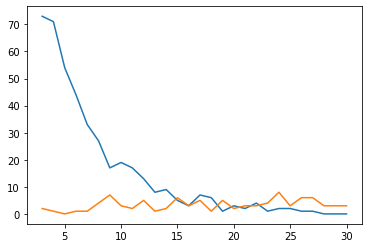

In [150]:
# Answer to 3d

def sweep(samples,trials, pval):
    i = 0
    falpos1 = np.zeros((trials, samples))
    falneg1 = np.zeros((trials, samples))
    falpos2 = np.zeros((trials, samples))
    falneg2 = np.zeros((trials, samples))
    pts = np.zeros(trials)
    ppval = np.zeros(trials)
    nts = np.zeros(trials)
    npval = np.zeros(trials)
    while i < trials: 
        falpos1[i] = np.random.lognormal(1,1, samples)
        falneg1[i] = np.random.lognormal(1,1, samples)
        falpos2[i] = np.random.lognormal(1,1, samples)
        falneg2[i] = np.random.lognormal(3,1, samples)
        pts[i], ppval[i] = ttest_ind(falpos1[i,:], falpos2[i,:])
        nts[i], npval[i] = ttest_ind(falneg1[i,:], falneg2[i,:])
        i = i+1    
    nfnb = npval > pval
    nfpb = ppval < pval
    falnegarr = len(npval[nfnb])
    falposarr = len(ppval[nfpb])
    #print(falpos1)
    return falnegarr, falposarr
falnegarrofarrs = np.zeros(28)
falposarrofarrs = np.zeros(28)    
for _ in range(3,31):
    falnegarrofarrs[_-3], falposarrofarrs[_-3] = sweep(_, 100, 0.05)
index = range(3,31)
plt.plot(index, falnegarrofarrs)
plt.plot(index, falposarrofarrs)

print(falnegarrofarrs)
print(falposarrofarrs)

This now shows that getting the number of false negatives(in blue), and the number of fale positives (orange) for when testing the distribution (of the actual distribution itself) 100 times and adding up each time that a false positive or fale negative results, while increasing the number of samples in that distribution. So instead of testing 100 means of a sample of differnet sizes or same sizes, (instead we take the 100 distributions from and get their t-test pvalue, and their false negative and false positives as such) I tried forever to do 100 samples means for 100 distributions from n = 3-31 samples, but then the means would not give me the t-test value, so I hope I did this is right. (I added in in 3d, 100 sample means for the 100 trials, and it perfectly matches what I had before, so I think it is right. (added that below) 

[76. 52. 55. 42. 36. 25. 22. 13. 17.  7. 14.  7.  4.  1.  5.  1.  1.  1.
  2.  1.  1.  2.  0.  0.  0.  1.  2.  0.]
[6. 3. 2. 3. 4. 3. 4. 3. 2. 4. 2. 3. 4. 2. 3. 3. 7. 2. 3. 4. 4. 4. 3. 3.
 6. 1. 8. 3.]


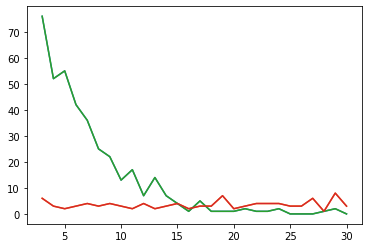

In [148]:
# Answer to 3d

def sweep(samples,trials, pval):
    i = 0
    j = 0
    falpos1 = np.zeros((trials, samples))
    falneg1 = np.zeros((trials, samples))
    falpos2 = np.zeros((trials, samples))
    falneg2 = np.zeros((trials, samples))
    falpos1m = np.zeros((trials, samples))
    falneg1m = np.zeros((trials, samples))
    falpos2m = np.zeros((trials, samples))
    falneg2m = np.zeros((trials, samples))
    pts = np.zeros(trials)
    ppval = np.zeros(trials)
    nts = np.zeros(trials)
    npval = np.zeros(trials)
    ptsm = np.zeros(trials)
    ppvalm = np.zeros(trials)
    ntsm = np.zeros(trials)
    npvalm = np.zeros(trials)
    while i < trials: 
        falpos1[i] = np.random.lognormal(1,1, samples)
        falneg1[i] = np.random.lognormal(1,1, samples)
        falpos2[i] = np.random.lognormal(1,1, samples)
        falneg2[i] = np.random.lognormal(3,1, samples)
        m = 100
        while j < m:
            falpos1m[j] = np.mean(np.random.lognormal(1,1, samples))
            falneg1m[j] = np.mean(np.random.lognormal(1,1, samples))
            falpos2m[j] = np.mean(np.random.lognormal(1,1, samples))
            falneg2m[j] = np.mean(np.random.lognormal(3,1, samples))
            j = j + 1
        pts[i], ppval[i] = ttest_ind(falpos1[i,:], falpos2[i,:])
        nts[i], npval[i] = ttest_ind(falneg1[i,:], falneg2[i,:])
        ptsm[i], ppvalm[i] = ttest_ind(falpos1m[i,:], falpos2m[i,:])
        ntsm[i], npvalm[i] = ttest_ind(falneg1m[i,:], falneg2m[i,:])
        i = i+1    
    nfnb = npval > pval
    nfpb = ppval < pval
    falnegarr = len(npval[nfnb])
    falposarr = len(ppval[nfpb])
    falnegarrm = len(npvalm[nfnb])
    falposarrm = len(ppvalm[nfpb])
    #print(falpos1)
    return falnegarr, falposarr, falnegarrm, falposarrm
falnegarrofarrs = np.zeros(28)
falposarrofarrs = np.zeros(28)
falnegarrofarrsm = np.zeros(28)
falposarrofarrsm = np.zeros(28) 
for _ in range(3,31):
    falnegarrofarrs[_-3], falposarrofarrs[_-3], falnegarrofarrsm[_-3], falposarrofarrsm[_-3]  = sweep(_, 100, 0.05)
index = range(3,31)
plt.plot(index, falnegarrofarrs)
plt.plot(index, falposarrofarrs)
plt.plot(index, falnegarrofarrsm)
plt.plot(index, falposarrofarrsm)

print(falnegarrofarrs)
print(falposarrofarrs)

#def lnmtry(trials, samples):
   # A = []
  #  lsd = []
  #  global ie
    ie = []
    ib = []
    global lsdxln
    lsdxln = []
    global ln
    ln = []
    global ln2
    ln2 = []
    
    for c in range (3,r+1):
        AX = []
        AB = []
        numfalse = 0
        for cc in range (1, 101): #make distributions with different sample sizes for means of them
            DA = np.random.lognormal(1,1,r)
            BD = np.random.lognormal(1,1,r)
            m = np.sum(DA)/np.size(DA) #mean of the samples
            m2 = np.sum(BD)/np.size(BD) #mean of the samples
            AX = np.append(AX, m) #stores the sample means (adding a new mean each time it samples from X)
            AB = np.append(AB, m2)
            sqia = (1 / math.sqrt(c)) # get value 1/sqrt(n)
            #for _ in range (1, 101)
        ts, pval = ttest_ind(AX,AB)
        if pval < 0.05:
            numfalse = numfalse + 1
            
            #print(AX)
        nfr100.append(numfalse)
        #print(pval)
        ln.append(AX)
        ln2.append(AB)
        ie = np.append(ie, c) #updates an array with the number of samples for that mean (m pos 1 is the mean for ia position 1, where ia position 1 is the number of
        #samples in that distribution  
        sdx = np.std(AX)
        lsdxln = np.append(lsdxln, sdx)
        #print(lsdx)
        ib = np.append(ie, sqia) 
    return

lnmtry(100)
print((nfr100))
#numfalse = 0
#for x in range (0,29):
 #   ts, pval = ttest_ind(ln[x],ln2[x])
  #  if pval < 0.05:
  #      numfalse = numfalse + 1
 #       nfr100.append(numfalse)
#print(nfr100)
#ttest_ind(ln[0],ln2[0])


# Answer to 3d
def lnmsfp(r):
    A = []
    lsd = []
    global ie
    ie = []
    ib = []
    global lsdxln
    lsdxln = []
    global ln
    ln = []
    global ln2
    ln2 = []
    for c in range (1,r+1):
        AX = []
        AB = []
        for cc in range (3, 31): #make distributions with different sample sizes for means of them
            DA = np.random.lognormal(1,1,c)
            BD = np.random.lognormal(1,1,c)
            m = np.sum(DA)/np.size(DA) #mean of the samples
            m2 = np.sum(BD)/np.size(BD) #mean of the samples
            AX = np.append(AX, m) #stores the sample means (adding a new mean each time it samples from X)
            AB = np.append(AB, m2)
            sqia = (1 / math.sqrt(c)) # get value 1/sqrt(n)
            #print(AX)
        #print(pval)
        ln.append(AX)
        ln2.append(AB)
        ie = np.append(ic, c) #updates an array with the number of samples for that mean (m pos 1 is the mean for ia position 1, where ia position 1 is the number of
        #samples in that distribution  
        sdx = np.std(AX)
        lsdxln = np.append(lsdxln, sdx)
        #print(lsdx)
        ib = np.append(ic, sqia) 
    return

lnmsfp(100)
nfr100 = []
numfalse = 0
for x in range (0,100):
    ts, pval = ttest_ind(ln[x],ln2[x])
    if pval < 0.05:
        numfalse = numfalse + 1
nfr100.append(numfalse)
print(numfalse)

def lnmsfn(r):
    A = []
    lsd = []
    global ie
    ie = []
    ib = []
    global lsdxln
    lsdxln = []
    global ln
    ln = []
    global ln2
    ln2 = []
    for c in range (1,r+1):
        AX = []
        AB = []
        for cc in range (3, 31): #make distributions with different sample sizes for means of them
            DA = np.random.lognormal(1,1,c)
            BD = np.random.lognormal(3,1,c)
            m = np.sum(DA)/np.size(DA) #mean of the samples
            m2 = np.sum(BD)/np.size(BD) #mean of the samples
            AX = np.append(AX, m) #stores the sample means (adding a new mean each time it samples from X)
            AB = np.append(AB, m2)
            sqia = (1 / math.sqrt(c)) # get value 1/sqrt(n)
            #print(AX)
        #print(pval)
        ln.append(AX)
        ln2.append(AB)
        ie = np.append(ic, c) #updates an array with the number of samples for that mean (m pos 1 is the mean for ia position 1, where ia position 1 is the number of
        #samples in that distribution  
        sdx = np.std(AX)
        lsdxln = np.append(lsdxln, sdx)
        #print(lsdx)
        ib = np.append(ic, sqia) 
    return

lnmsfn(100)
print(np.size(ln[0]))
#print(ln2)
nfr100 = []
numfalse = 0
for x in range (0,20):
    ts, pval = ttest_ind(ln[x],ln2[x])
    if pval > 0.05:
        numfalse = numfalse + 1
    nfr100.append(numfalse)
    

print(nfr100)



In [312]:
#print(ln)

#### 3e. For n=3, suggest how the number of false negatives changes according to sigma for the two distributions and test this. Report your new values and sigma and the number of false negatives in 100 tests.

std changes from from 0 - 29
100 tests for each change in std for false neg is in blue
[  5.  72.  94.  96. 100.  98.  97.  95.  98.  96. 100.  99.  98.  98.
  94.  96.  96.  93.  98.  97.  95.  97.  93.  96.  98.  92.  97.  94.
  95.]


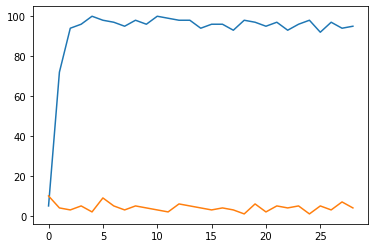

In [144]:
# Answer to 3e
def sweep2(samples,trials, pval, std, std2):
    i = 0
    falpos1 = np.zeros((trials, samples))
    falneg1 = np.zeros((trials, samples))
    falpos2 = np.zeros((trials, samples))
    falneg2 = np.zeros((trials, samples))
    
    pts = np.zeros(trials)
    ppval = np.zeros(trials)
    nts = np.zeros(trials)
    npval = np.zeros(trials)
    
    while i < trials: 
        falpos1[i] = np.random.lognormal(1,std, samples)
        falneg1[i] = np.random.lognormal(1,std, samples)
        falpos2[i] = np.random.lognormal(1,std2, samples)
        falneg2[i] = np.random.lognormal(3,std2, samples)
        
        pts[i], ppval[i] = ttest_ind(falpos1[i,:], falpos2[i,:])
        nts[i], npval[i] = ttest_ind(falneg1[i,:], falneg2[i,:])
        i = i+1
        
    nfnb = npval > pval
    nfpb = ppval < pval
    falnegarr = len(npval[nfnb])
    falposarr = len(ppval[nfpb])
    #print(falpos1)
    return falnegarr, falposarr

falnegarrofarrs2 = np.zeros(29)
falposarrofarrs2 = np.zeros(29)    

for _ in range(0,29):
    falnegarrofarrs2[_], falposarrofarrs2[_] = sweep2(3, 100, 0.05, 1, _)

index = range(0,29)
plt.plot(index, falnegarrofarrs2)
plt.plot(index, falposarrofarrs2)
print("std changes from from 0 - 29")
print("100 tests for each change in std for false neg is in blue")
print(falnegarrofarrs2)

In [142]:
#falneg1 = np.random.lognormal(1,0, 3)
#f1 = np.mean(falneg1)
#falneg2 = np.random.lognormal(3,100, 3)
#f2 = np.mean(falneg2)
#ttest_ind(falneg1,falneg2)
#plt.hist(falneg1, 10)

Ttest_indResult(statistic=-1.0000096477192186, pvalue=0.3738968243124873)

#### 3f. Lastly, perform 3d for p < 0.01 instead of p < 0.05. How does this influence the rate of false positives and negatives? How might you use this when performing many tests?

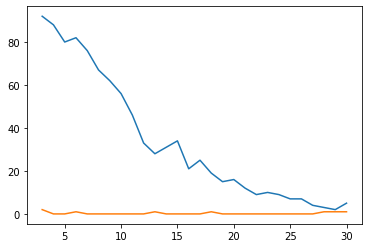

In [118]:
# Answer to 3f
def sweep3(samples,trials, pval):
    i = 0
    falpos1 = np.zeros((trials, samples))
    falneg1 = np.zeros((trials, samples))
    falpos2 = np.zeros((trials, samples))
    falneg2 = np.zeros((trials, samples))
    
    pts = np.zeros(trials)
    ppval = np.zeros(trials)
    nts = np.zeros(trials)
    npval = np.zeros(trials)
    
    while i < trials: 
        falpos1[i] = np.random.lognormal(1,1, samples)
        falneg1[i] = np.random.lognormal(1,1, samples)
        falpos2[i] = np.random.lognormal(1,1, samples)
        falneg2[i] = np.random.lognormal(3,1, samples)
        
        pts[i], ppval[i] = ttest_ind(falpos1[i,:], falpos2[i,:])
        nts[i], npval[i] = ttest_ind(falneg1[i,:], falneg2[i,:])
        i = i+1
        
    nfnb = npval > pval
    nfpb = ppval < pval
    falnegarr = len(npval[nfnb])
    falposarr = len(ppval[nfpb])
    #print(falpos1)
    return falnegarr, falposarr

falnegarrofarrs3 = np.zeros(28)
falposarrofarrs3 = np.zeros(28)    

for _ in range(3,31):
    falnegarrofarrs3[_-3], falposarrofarrs3[_-3] = sweep3(_, 100, 0.01)

index = range(3,31)
plt.plot(index, falnegarrofarrs3)
plt.plot(index, falposarrofarrs3)

The rate of false positives smoothes out, but the rate of false negatives increases ( use to be a greater decrease in rate of false negatives, but now it is a slower decreasing rate), this means that I can use this to 

## (4) Power analysis

Now that we've observed the trends above, we have all the tools to talk about power analysis. Power analysis is an essential step when designing an experiment, and asks *assuming we should be rejecting the null hypothesis, what is the probability we will do so*. The power of an experiment is equal to 1 minus the false negative rate. A common choice for the power of an experiment (like a p-value cutoff of 0.05) is 0.8.

#### 4a. Power analysis is often used to determine the necessary N of an experiment. Why might this be used as opposed to the false positive rate?

Answer

#### 4b. Determine the necessary N to acheive a power of 0.8 from the situation in (3).

necessary N for a power rate of o.8 is between : 7 8 samples


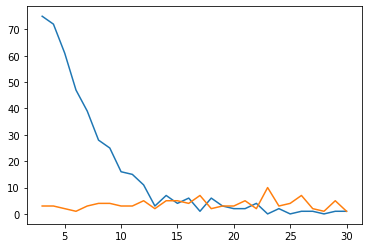

In [128]:
# Answer.
# Answer to 3f
def sweep4(samples,trials, pval):
    i = 0
    falpos1 = np.zeros((trials, samples))
    falneg1 = np.zeros((trials, samples))
    falpos2 = np.zeros((trials, samples))
    falneg2 = np.zeros((trials, samples))
    
    pts = np.zeros(trials)
    ppval = np.zeros(trials)
    nts = np.zeros(trials)
    npval = np.zeros(trials)
    
    while i < trials: 
        falpos1[i] = np.random.lognormal(1,1, samples)
        falneg1[i] = np.random.lognormal(1,1, samples)
        falpos2[i] = np.random.lognormal(1,1, samples)
        falneg2[i] = np.random.lognormal(3,1, samples)
        
        pts[i], ppval[i] = ttest_ind(falpos1[i,:], falpos2[i,:])
        nts[i], npval[i] = ttest_ind(falneg1[i,:], falneg2[i,:])
        i = i+1
        
    nfnb = npval > pval
    nfpb = ppval < pval
    falnegarr = len(npval[nfnb])
    falposarr = len(ppval[nfpb])
    #print(falpos1)
    return falnegarr, falposarr
index = range(3,31)
falnegarrofarrs4 = np.zeros(28)
falposarrofarrs4 = np.zeros(28)    
pwrrate = np.zeros(28)
for _ in range(3,31):
    falnegarrofarrs3[_-3], falposarrofarrs3[_-3] = sweep4(_, 100, 0.05)
    pwrrate[_-3] = 1 - (falnegarrofarrs3[_-3]/100)

t= 0
while pwrrate[t] <= 0.8:
    t = t +1
print("necessary N for a power rate of 0.8 is between :", t, t+1, "samples" )

plt.plot(index, falnegarrofarrs3)
plt.plot(index, falposarrofarrs3)
#print(pwrrate)


## (5) Shaffer et al

In this excercise we're going to explore some basic concepts of statistics, and use them to build up to some more advanced ideas. To examine these ideas we're going to consider a classic of molecular biology—the [Luria-Delbrück experiment](https://en.wikipedia.org/wiki/Luria–Delbrück_experiment). The data we'll use is from [Shaffer et al](https://www.nature.com/articles/nature22794).

In [75]:
repOne = np.array([259, 213, 182, 167, 254, 221, 236, 168, 190, 262, 285, 158, 240, 187, 326, 116, 220, 309, 181, 268, 285, 467, 121, 177, 188, 116, 218, 195, 260, 307, 213, 314, 220, 245, 325, 220, 222, 336, 60, 268, 252, 112, 252])
repTwo = np.array([28, 72, 53, 103, 46, 90, 105, 78, 86, 127, 30, 52, 105, 111, 88, 35, 23, 119, 89, 110, 138, 79, 118, 107, 38, 71, 104, 61, 125])

#### 5a. First, we need to build up a distribution of outcomes for what an experiment would look like if it followed the Luria-Delbruck process.
Fill in the function below keeping track of normal and mutant cells. Then, make a second function, `CVofNRuns`, that runs the experiment 3000 times. You can assume a culture size of 120000 cells, and mutation rate of 0.0001 per cell per generation. What does the distribution of outcomes look like?

In [2]:
# Runs the simulation a bunch of times, and looks for how often the fano (cv/mean) comes out to one side

def simLuriaDelbruck(cultureSize, mutationRate):
    nCells, nMuts = 1, 0  # Start with 1 non-resistant cell

    for _ in range(int(np.floor(np.log2(cultureSize)))):  # num of gens
        nCells = nCells*2     # Double the number of cells, simulating division
        newMuts = np.random.poisson(nCells * mutationRate)  # de novo
        nMuts = (nMuts/2) + newMuts    # Previous mutants divide and add
        nCells =   cultureSize - newMuts    # Non-resistant pop goes down by newMuts

    return nMuts

def CVofNRuns(nRuns):
    global r 
    r = []
    cultureSize = 120000
    mutationRate = 0.0001
    for i in range(1, nRuns+1):
        nMuts = simLuriaDelbruck(cultureSize, mutationRate)
        r.append(nMuts)
    
    return 
simLuriaDelbruck(120000, 0.0001)
CVofNRuns(3000)
plt.figure()
rscore = (r/np.mean(r))
plt.hist(rscore,10)


NameError: name 'np' is not defined

#### 5b. Compare the distribution of outcomes between the two replicates of the experiment using the 2-sample KS test. Are they consistent with one another?
Hint: Each experiment varies slightly in the amount of time it was run. The absolute values of the numbers doesn't matter, so much as the variation of them. You'll need to correct for this by dividing by the mean of the results.

In [1]:
# Answer to 5b


roscore = (repOne/np.mean(repOne))
rtscore = (repTwo/np.mean(repTwo))
#print(ks_2samp(rscore,repOne))
#print(ks_2samp(rscore,repTwo))
res1 = ks_2samp(rscore, roscore)
print(res1)
res2 = ks_2samp(rscore, rtscore)
print(res2)
plt.hist(rscore,10)
plt.figure()
plt.hist(roscore,10)
plt.figure()
plt.hist(rtscore,10)
plt.figure()
#plt.hist(repOne,10)
#plt.figure()
#plt.hist(repTwo,10)
#plt.figure()
#plt.hist(r,10)
rep1 = ks_2samp(rtscore, roscore)
print(rep1)

NameError: name 'repOne' is not defined

#### 5c. Compare the distribution of outcomes between the experiment and model. Are our results consistent with resistance arising through a Luria-Delbruck related process?

In [ ]:
# Answer to 5c


#### 5d. We assumed a specific mutation rate and final number of cells. How might you show whether or not these parameters influence our results?

Answer.